In [1]:
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import datetime
import pandas as pd
from multihist import Hist1d, Histdd
import time
import itertools
import os,sys
from scipy import stats
from scipy.optimize import curve_fit
import math
import warnings
warnings.filterwarnings('ignore')
import copy

print('Start import')
import socket 
import strax
import straxen
import cutax
straxen.print_versions()

from straxen import units
import peaks_utility as psu
import drift_diffusion_utility as ddu
import s2widthcut_utility as wcu

Start import
Working on midway2-0462.rcc.local with the following versions and installation paths:
python	v3.8.12	(default, Oct 12 2021, 13:49:34) [GCC 7.5.0]
strax	v1.1.5	/opt/XENONnT/anaconda/envs/XENONnT_2022.01.4/lib/python3.8/site-packages/strax
straxen	v1.2.6	/opt/XENONnT/anaconda/envs/XENONnT_2022.01.4/lib/python3.8/site-packages/straxen
cutax	v1.3.0	/dali/lgrandi/xenonnt/software/cutax/v1.3.0/cutax


In [2]:
from cutax.cuts.s2_width import S2WidthStrict
from cutax.cuts.krypton_selections import KrSingleS1S2
from cutax.cuts.krypton_selections import KrDoubleS1SingleS2
from cutax.cuts.s1_max_pmt import S1MaxPMT
from cutax.cuts.s1_aft import S1AreaFractionTop
from cutax.cuts.fiducial_volume import FiducialVolume

In [3]:
st = cutax.contexts.xenonnt_v6()
st.register([S2WidthStrict,KrSingleS1S2,KrDoubleS1SingleS2,S1MaxPMT,S1AreaFractionTop,FiducialVolume])

In [4]:
dsets = st.select_runs(exclude_tags=('messy','bad','nonsr0_configuration','ramp down','ramp_down','ramp_up',
                                     'ramp up','hot_spot','abandon'),
                       include_tags=["_sr0*"],
                       available=['event_info',"event_pattern_fit"],
                       run_mode='tpc_kr83m',)

Fetching run info from MongoDB:   0%|          | 0/32100 [00:00<?, ?it/s]

Checking data availability:   0%|          | 0/4 [00:00<?, ?it/s]

In [5]:
runs = dsets.name.values[:]

In [6]:
dates = ['06/04/2021','06/18/2021','06/29/2021','07/18/2021','08/02/2021','08/10/2021','08/24/2021','09/06/2021','09/20/2021','10/04/2021','10/18/2021','1\
1/01/2021','11/10/2021','11/28/2021']

In [7]:
dsets0 = dsets[(dsets.end > pd.to_datetime('06/04/2021')) & (dsets.end < pd.to_datetime('06/08/2021'))]
dsets1 = dsets[(dsets.end > pd.to_datetime('06/18/2021')) & (dsets.end < pd.to_datetime('06/22/2021'))]
dsets2 = dsets[(dsets.end > pd.to_datetime('06/29/2021')) & (dsets.end < pd.to_datetime('07/02/2021'))]
dsets3 = dsets[(dsets.end > pd.to_datetime('07/18/2021')) & (dsets.end < pd.to_datetime('07/21/2021'))]
dsets4 = dsets[(dsets.end > pd.to_datetime('08/02/2021')) & (dsets.end < pd.to_datetime('08/04/2021'))]
dsets5 = dsets[(dsets.end > pd.to_datetime('08/10/2021')) & (dsets.end < pd.to_datetime('08/12/2021'))]
dsets6 = dsets[(dsets.end > pd.to_datetime('08/24/2021')) & (dsets.end < pd.to_datetime('08/26/2021'))]
dsets7 = dsets[(dsets.end > pd.to_datetime('09/06/2021')) & (dsets.end < pd.to_datetime('09/08/2021'))]
dsets8 = dsets[(dsets.end > pd.to_datetime('09/20/2021')) & (dsets.end < pd.to_datetime('09/22/2021'))]
dsets9 = dsets[(dsets.end > pd.to_datetime('10/04/2021')) & (dsets.end < pd.to_datetime('10/06/2021'))]
dsets10 = dsets[(dsets.end > pd.to_datetime('10/18/2021')) & (dsets.end < pd.to_datetime('10/21/2021'))]
dsets11 = dsets[(dsets.end > pd.to_datetime('11/01/2021')) & (dsets.end < pd.to_datetime('11/03/2021'))]
dsets12 = dsets[(dsets.end > pd.to_datetime('11/10/2021')) & (dsets.end < pd.to_datetime('11/14/2021'))]
dsets13 = dsets[(dsets.end > pd.to_datetime('11/28/2021')) & (dsets.end < pd.to_datetime('12/01/2021'))]

In [8]:
krrun0 = dsets0.name.values[:]
krrun1 = dsets1.name.values[:]
krrun2 = dsets2.name.values[:]
krrun3 = dsets3.name.values[:]
krrun4 = dsets4.name.values[:]
krrun5 = dsets5.name.values[:]
krrun6 = dsets6.name.values[:]
krrun7 = dsets7.name.values[:]
krrun8 = dsets8.name.values[:]
krrun9 = dsets9.name.values[:]
krrun10 = dsets10.name.values[:]
krrun11 = dsets11.name.values[:]
krrun12 = dsets12.name.values[:]
krrun13 = dsets13.name.values[:]

In [ ]:
ev0 = wcu.merge_runs_kr(st,krrun0)
ev1 = wcu.merge_runs_kr(st,krrun1)
ev2 = wcu.merge_runs_kr(st,krrun2)
ev3 = wcu.merge_runs_kr(st,krrun3)
ev4 = wcu.merge_runs_kr(st,krrun4)
ev5 = wcu.merge_runs_kr(st,krrun5)
ev6 = wcu.merge_runs_kr(st,krrun6)
ev7 = wcu.merge_runs_kr(st,krrun7)
ev8 = wcu.merge_runs_kr(st,krrun8)
ev9 = wcu.merge_runs_kr(st,krrun9)
ev10 = wcu.merge_runs_kr(st,krrun10)
ev11 = wcu.merge_runs_kr(st,krrun11)
ev12 = wcu.merge_runs_kr(st,krrun12)
ev13 = wcu.merge_runs_kr(st,krrun13)

In [10]:
ev0.to_pickle(f'data/SR0_v6_Kr83m_{krrun0[-1]}_{krrun0[0]}_EventInfoDouble.pkl')
ev1.to_pickle(f'data/SR0_v6_Kr83m_{krrun1[-1]}_{krrun1[0]}_EventInfoDouble.pkl')
ev2.to_pickle(f'data/SR0_v6_Kr83m_{krrun2[-1]}_{krrun2[0]}_EventInfoDouble.pkl')
ev3.to_pickle(f'data/SR0_v6_Kr83m_{krrun3[-1]}_{krrun3[0]}_EventInfoDouble.pkl')
ev4.to_pickle(f'data/SR0_v6_Kr83m_{krrun4[-1]}_{krrun4[0]}_EventInfoDouble.pkl')
ev5.to_pickle(f'data/SR0_v6_Kr83m_{krrun5[-1]}_{krrun5[0]}_EventInfoDouble.pkl')
ev6.to_pickle(f'data/SR0_v6_Kr83m_{krrun6[-1]}_{krrun6[0]}_EventInfoDouble.pkl')
ev7.to_pickle(f'data/SR0_v6_Kr83m_{krrun7[-1]}_{krrun7[0]}_EventInfoDouble.pkl')
ev8.to_pickle(f'data/SR0_v6_Kr83m_{krrun8[-1]}_{krrun8[0]}_EventInfoDouble.pkl')
ev9.to_pickle(f'data/SR0_v6_Kr83m_{krrun9[-1]}_{krrun9[0]}_EventInfoDouble.pkl')
ev10.to_pickle(f'data/SR0_v6_Kr83m_{krrun10[-1]}_{krrun10[0]}_EventInfoDouble.pkl')
ev11.to_pickle(f'data/SR0_v6_Kr83m_{krrun11[-1]}_{krrun11[0]}_EventInfoDouble.pkl')
ev12.to_pickle(f'data/SR0_v6_Kr83m_{krrun12[-1]}_{krrun12[0]}_EventInfoDouble.pkl')
ev13.to_pickle(f'data/SR0_v6_Kr83m_{krrun13[-1]}_{krrun13[0]}_EventInfoDouble.pkl')

In [9]:
ddir = '/dali/lgrandi/dandrea/data'
ev0 = pd.read_pickle(f'{ddir}/SR0_v6_Kr83m_{krrun0[-1]}_{krrun0[0]}_EventInfoDouble.pkl')
ev1 = pd.read_pickle(f'{ddir}/SR0_v6_Kr83m_{krrun1[-1]}_{krrun1[0]}_EventInfoDouble.pkl')
ev2 = pd.read_pickle(f'{ddir}/SR0_v6_Kr83m_{krrun2[-1]}_{krrun2[0]}_EventInfoDouble.pkl')
ev3 = pd.read_pickle(f'{ddir}/SR0_v6_Kr83m_{krrun3[-1]}_{krrun3[0]}_EventInfoDouble.pkl')
ev4 = pd.read_pickle(f'{ddir}/SR0_v6_Kr83m_{krrun4[-1]}_{krrun4[0]}_EventInfoDouble.pkl')
ev5 = pd.read_pickle(f'{ddir}/SR0_v6_Kr83m_{krrun5[-1]}_{krrun5[0]}_EventInfoDouble.pkl')
ev6 = pd.read_pickle(f'{ddir}/SR0_v6_Kr83m_{krrun6[-1]}_{krrun6[0]}_EventInfoDouble.pkl')
ev7 = pd.read_pickle(f'{ddir}/SR0_v6_Kr83m_{krrun7[-1]}_{krrun7[0]}_EventInfoDouble.pkl')
ev8 = pd.read_pickle(f'{ddir}/SR0_v6_Kr83m_{krrun8[-1]}_{krrun8[0]}_EventInfoDouble.pkl')
ev9 = pd.read_pickle(f'{ddir}/SR0_v6_Kr83m_{krrun9[-1]}_{krrun9[0]}_EventInfoDouble.pkl')
ev10 = pd.read_pickle(f'{ddir}/SR0_v6_Kr83m_{krrun10[-1]}_{krrun10[0]}_EventInfoDouble.pkl')
ev11 = pd.read_pickle(f'{ddir}/SR0_v6_Kr83m_{krrun11[-1]}_{krrun11[0]}_EventInfoDouble.pkl')
ev12 = pd.read_pickle(f'{ddir}/SR0_v6_Kr83m_{krrun12[-1]}_{krrun12[0]}_EventInfoDouble.pkl')
ev13 = pd.read_pickle(f'{ddir}/SR0_v6_Kr83m_{krrun13[-1]}_{krrun13[0]}_EventInfoDouble.pkl')

In [10]:
evlist = [ev0,ev1,ev2,ev3,ev4,ev5,ev6,ev7,ev8,ev9,ev10,ev11,ev12,ev13]

In [11]:
def diffusion_analysis_kr(ev, title = 'Kr83m', fit_range = (50,2000),
                          FV = False, plot = False ):
    #if(plot): ddu.plot_area_width_aft_kr(ev, title)
    mask = ev['cut_Kr_SingleS1S2']
    mask &= (ev['cut_s1_max_pmt'])
    mask &= (ev['cut_daq_veto']) & (ev['cut_s1_area_fraction_top']) & (ev['cut_s2_single_scatter'])
    maskFW, maskNW = wcu.mask_S2Width_vs_pos_kr(ev)
    maskFV = ev['cut_fiducial_volume']
    #if(plot): ddu.plot_area_width_aft_kr(ev[mask], title)
    #wcu.plot_r2_z(ev[mask],title)
    vd, vd_err, cathodedt, gatedt, s2shift = ddu.drift_velocity_kr(ev[mask], title,binning=2000,w=4,plot=plot)
    if FV: evD = ev[mask & maskFW & maskFV]
    else: evD = ev[mask & maskFW]
    d, d_err, par, par_err = ddu.diffusion_constant_kr(evD,title,fit_range=fit_range,vd = vd,plot=plot)
    return vd, vd_err, d, d_err, cathodedt, gatedt, s2shift, par, par_err

Drift velocity = 0.674 +/- 0.003 mm/us
Diffusion constant = 45.63 +/- 0.13 cm2/s, tGate = 14.53 us


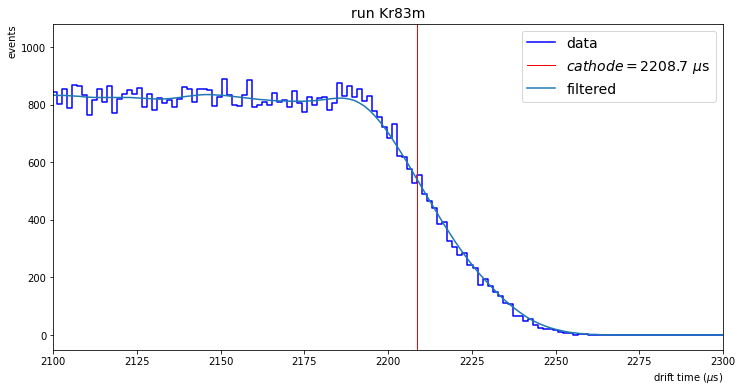

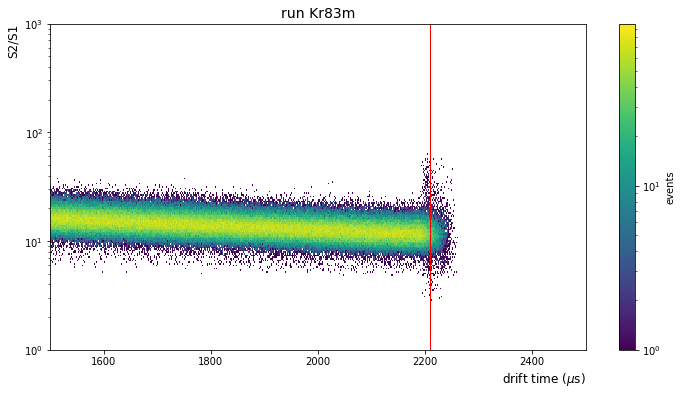

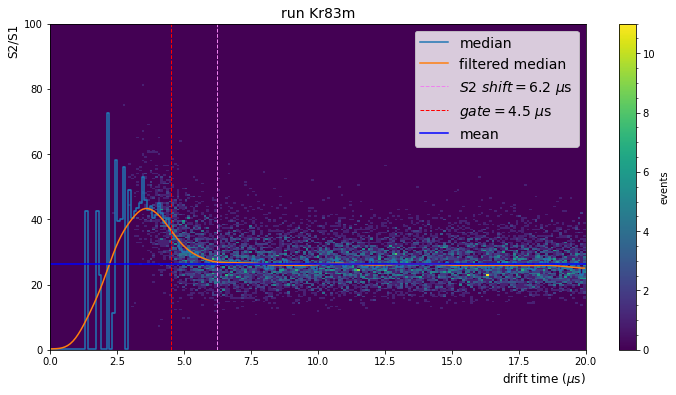

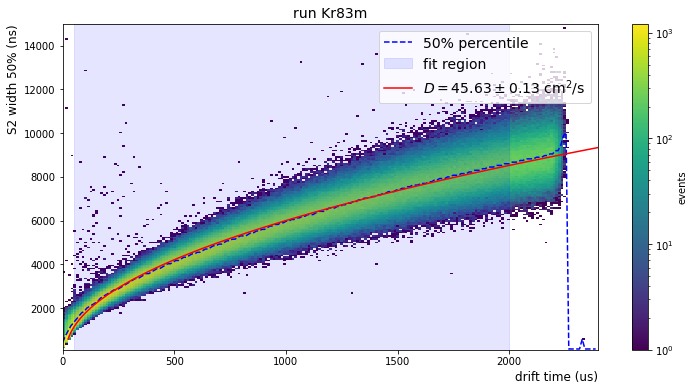

In [12]:
a = diffusion_analysis_kr(ev1,plot=1)

In [15]:
def analysis(ev_list):
    nn = len(ev_list)
    runs, vd, vd_err = np.zeros(nn), np.zeros(nn), np.zeros(nn)
    d, d_err, par, par_err = np.zeros(nn), np.zeros(nn), np.zeros(nn), np.zeros(nn)
    cc, gg, ss, tGate, tGate_err = np.zeros(nn), np.zeros(nn), np.zeros(nn), np.zeros(nn), np.zeros(nn)
    for i, ev in enumerate(ev_list):
        runs[i] = i
        vd[i], vd_err[i], d[i], d_err[i], cc[i], gg[i], ss[i], par, par_err = diffusion_analysis_kr(ev)
        tGate[i], tGate_err[i] = par[1]/units.ns, par_err[1]/units.ns
        print(f'run {i}, {vd[i]:.3f} +/- {vd_err[i]:.3f} mm/us, {d[i]:.2f} +/- {d_err[i]:.2f} cm2/s, {cc[i]:.2f} us, {gg[i]:.2f} us, {ss[i]:.2f} us, {tGate[i]:.2f} us')
    return vd, vd_err, d, d_err, cc, gg, ss, tGate, tGate_err

In [16]:
vd, vd_err, d, d_err, cc, gg, ss, tGate, tGate_err = analysis(evlist)

run 0, 0.675 +/- 0.003 mm/us, 45.63 +/- 0.13 cm2/s, 2205.76 us, 4.72 us, 5.83 us, 15.03 us
run 1, 0.674 +/- 0.003 mm/us, 45.63 +/- 0.13 cm2/s, 2208.75 us, 4.52 us, 6.23 us, 14.53 us
run 2, 0.675 +/- 0.003 mm/us, 45.71 +/- 0.13 cm2/s, 2205.01 us, 4.32 us, 6.03 us, 13.91 us
run 3, 0.676 +/- 0.003 mm/us, 45.62 +/- 0.13 cm2/s, 2202.02 us, 4.02 us, 6.03 us, 14.52 us
run 4, 0.677 +/- 0.003 mm/us, 45.79 +/- 0.13 cm2/s, 2198.28 us, 4.02 us, 6.53 us, 14.83 us
run 5, 0.675 +/- 0.003 mm/us, 45.64 +/- 0.13 cm2/s, 2203.51 us, 4.42 us, 6.13 us, 14.87 us
run 6, 0.675 +/- 0.003 mm/us, 45.63 +/- 0.12 cm2/s, 2203.51 us, 4.52 us, 5.73 us, 14.27 us
run 7, 0.675 +/- 0.003 mm/us, 45.64 +/- 0.13 cm2/s, 2203.51 us, 5.03 us, 7.04 us, 15.61 us
run 8, 0.677 +/- 0.003 mm/us, 45.78 +/- 0.13 cm2/s, 2199.77 us, 4.92 us, 5.73 us, 14.31 us
run 9, 0.676 +/- 0.003 mm/us, 45.67 +/- 0.13 cm2/s, 2202.77 us, 4.62 us, 5.73 us, 15.50 us
run 10, 0.676 +/- 0.003 mm/us, 45.65 +/- 0.13 cm2/s, 2202.02 us, 4.42 us, 6.63 us, 14.10 u

In [17]:
def plot_results_vs_runs(dates, vd, vd_err, d, d_err, cc, gg, ss, tGate, tGate_err):
    # diffusion constant
    plt.figure(figsize=(12,6))
    plt.xlabel("date", ha='right', x=1,fontsize=14)
    plt.ylabel("diffusion constant (cm$^2$/s)", ha='right', y=1,fontsize=14)
    plt.errorbar(dates, d, yerr = d_err, fmt='s',c='b',label='diffusion constant')
    mean1 = d[d>0].mean()
    std1 = d[d>0].std()/np.sqrt(np.size(d))+d_err[d>0].mean()
    plt.axhline(mean1,color='r',label=f'$D = {mean1:.2f} \pm {std1:.2f}$ cm$^2$/s')
    plt.xticks(rotation=30)
    plt.legend(fontsize=14)
    
    # cathodedt
    plt.figure(figsize=(12,6))
    plt.xlabel("date", ha='right', x=1,fontsize=14)
    plt.ylabel("cathode drift time ($\mu$s)", ha='right', y=1,fontsize=14)
    plt.errorbar(dates,cc,yerr=10,fmt='s',color='b',label='cathode drift time')
    cm1, cs1 = cc.mean(), cc.std()/np.sqrt(np.size(cc))
    plt.axhline(cm1, color='r',label=f'$cathode = {cm1:.1f} \pm {cs1:.1f}$ mm/$\mu$s')
    plt.xticks(rotation=30)
    plt.legend(fontsize=14)

    # gatedt
    plt.figure(figsize=(12,6))
    plt.xlabel("date", ha='right', x=1,fontsize=14)
    plt.ylabel("gate drift time ($\mu$s)", ha='right', y=1,fontsize=14)
    plt.errorbar(dates,gg,yerr=1,fmt='s',color='g',label='gate drift time')
    gm1, gs1 = gg[gg>0].mean(), (gg[gg>0].max()-gg[gg>0].min())/2
    plt.axhline(gm1,color='r',label=f'$gate = {gm1:.1f} \pm {gs1:.1f}$ mm/$\mu$s')
    plt.xticks(rotation=30)
    plt.legend(fontsize=14)

    # s2 shift time
    plt.figure(figsize=(12,6))
    plt.xlabel("date", ha='right', x=1,fontsize=14)
    plt.ylabel("S2 shifted time ($\mu$s)", ha='right', y=1,fontsize=14)
    plt.errorbar(dates,ss,yerr=1,fmt='s',color='violet',label='S2 shifted time')
    sme1, sst1 = ss[ss>0].mean(), (ss[ss>0].max()-ss[ss>0].min())/2
    plt.axhline(sme1,color='r',label=f'$S2 shift = {sme1:.1f} \pm {sst1:.1f}$ mm/$\mu$s')
    plt.legend(fontsize=14)
    plt.xticks(rotation=30)

    # drift velocity
    plt.figure(figsize=(12,6))
    plt.xlabel("date", ha='right', x=1,fontsize=14)
    plt.ylabel("drift velocity (mm/$\mu$s)", ha='right', y=1,fontsize=14)
    plt.errorbar(dates,vd,yerr=vd_err,fmt='s',color='r',label='drift velocity')
    m1 = vd[vd>0].mean()
    s1 = vd[vd>0].std()/np.sqrt(np.size(vd))+vd_err[vd>0].mean()+vd_err[vd>0].mean()
    plt.axhline(m1,color='r',label=f'$v_D = {m1:.3f} \pm {s1:.3f}$ mm/$\mu$s')
    plt.xticks(rotation=30)
    plt.legend(fontsize=14)
    
    # tGate
    plt.figure(figsize=(12,6))
    plt.xlabel("date", ha='right', x=1,fontsize=14)
    plt.ylabel("tGate ($\mu$s)", ha='right', y=1,fontsize=14)
    plt.errorbar(dates,tGate,yerr=tGate_err,fmt='s',color='g',label='tGate')
    tGatem, tGates = tGate[tGate>0].mean(), (tGate[tGate>0].max()-tGate[tGate>0].min())/2
    plt.axhline(tGatem,color='r',label=f'$tGate = {tGatem:.1f} \pm {tGates:.1f}~\mu$s')
    plt.legend(fontsize=14)
    plt.xticks(rotation=30)
    print(f'vD = {m1:.3f} +/- {s1:.3f} mm/us')
    print(f'D = {mean1:.2f} +/- {std1:.2f} cm2/s')
    return mean1, std1, m1, s1

vD = 0.675 +/- 0.006 mm/us
D = 45.66 +/- 0.15 cm2/s


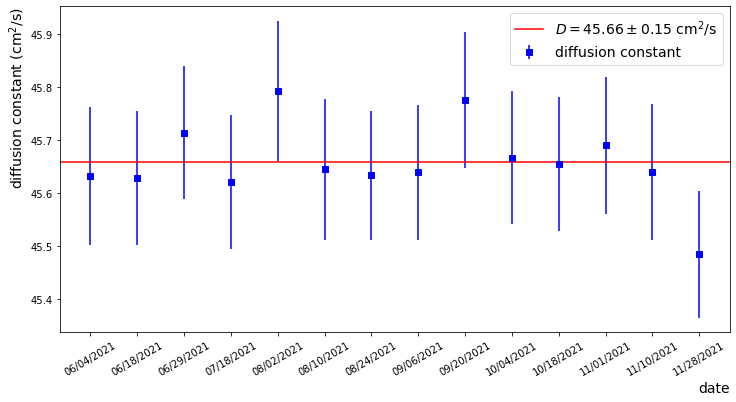

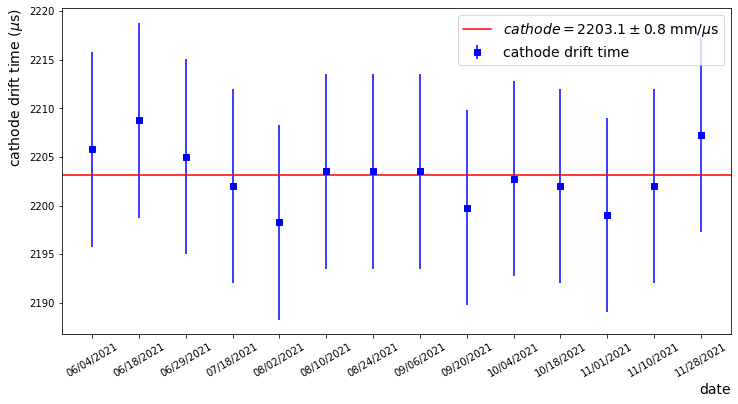

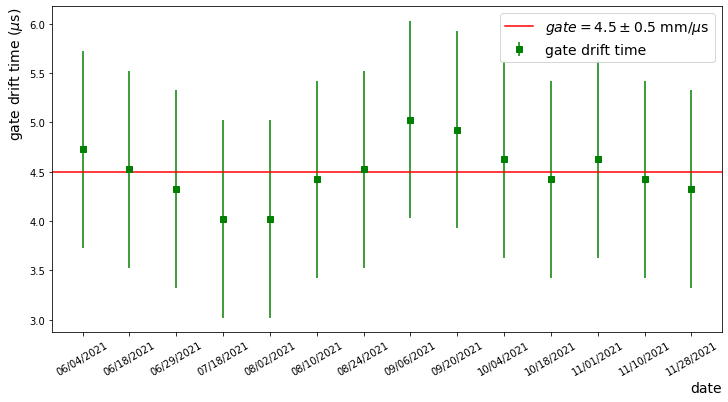

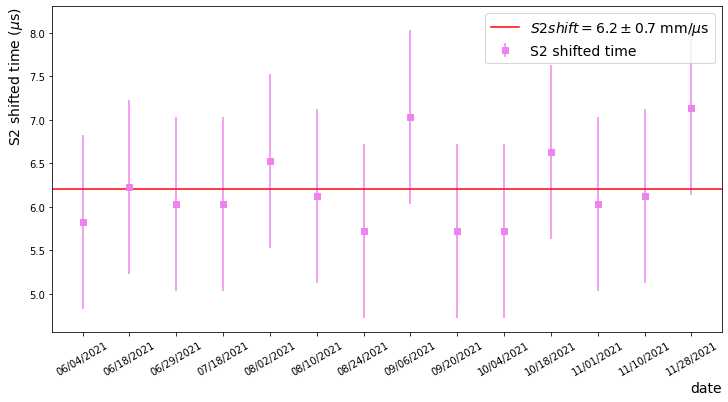

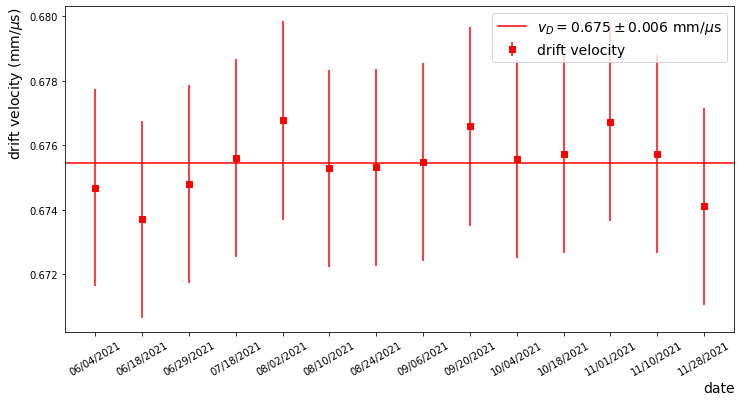

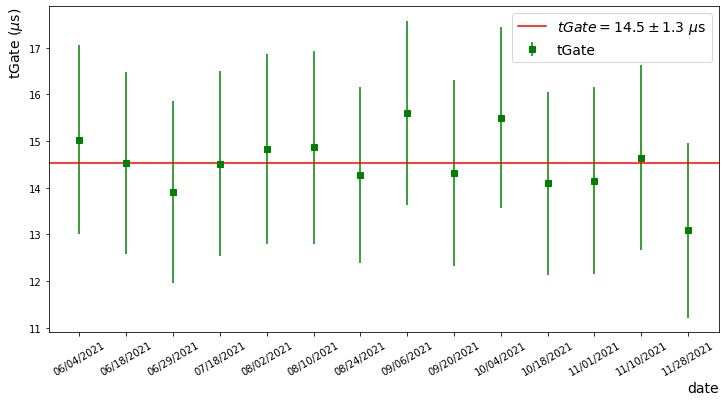

In [18]:
mean1, std1, m1, s1 = plot_results_vs_runs(dates, vd, vd_err, d, d_err, cc, gg, ss, tGate, tGate_err)

In [ ]:
def compare_drift_velocity(vd_SR0,vd_SR0_err,ms=5):
    with open("DriftVelocity.txt") as f:
        data = f.read()
    data = data.split('\n')
    ind = [row.split('\t')[0] for row in data]
    dt = [row.split('\t')[1] for row in data]
    dv = [row.split('\t')[2] for row in data]
    dt, dv = np.array(dt, dtype=np.float32), np.array(dv, dtype=np.float32)

    with open("DriftVelocity-Hogenbirk.txt") as f:
        data = f.read()
    data = data.split('\n')
    ff = [row.split(' ')[0] for row in data]
    dd = [row.split(' ')[1] for row in data]
    fe = [row.split(' ')[2] for row in data]
    de = [row.split(' ')[3] for row in data]
    ff, fe = np.array(ff, dtype=np.float32), np.array(fe, dtype=np.float32)
    dd, de = np.array(dd, dtype=np.float32), np.array(de, dtype=np.float32)

    with open("DriftVelocity-Njoya.txt") as f:
        data = f.read()
    data = data.split('\n')
    f_n = [row.split(' ')[0] for row in data]
    d_n = [row.split(' ')[1] for row in data]
    d_n, f_n = np.array(d_n, dtype=np.float32), np.array(f_n, dtype=np.float32)

    with open("DriftVelocity-Gushchin.txt") as f:
        data = f.read()
    data = data.split('\n')
    f_g = [row.split(' ')[0] for row in data]
    d_g = [row.split(' ')[1] for row in data]
    d_g, f_g = np.array(d_g, dtype=np.float32), np.array(f_g, dtype=np.float32)
    
    #vd_nT, vd_nT_err = [0.63,0.631], [0.006,0.003]
    #vd_nTb, vd_nTb_err = [0.596,0.619, 0.622], [0.005,0.003,0.003]
    #field_nT = np.full(len(vd_nT),18.3)
    #field_nTb = np.full(len(vd_nTb),18.3)
    field_1T, vd_1T = [155,134,124,92.8], [1.482,1.456,1.440,1.371]
    field_SR0 = np.full(len(vd_SR0),20.3)
    #plt.figure(figsize=(8,4.5))
    fig, ax = plt.subplots(figsize=(8,4.5))
    plt.xlabel('drift field (V/cm)',ha='right',x=1)
    plt.ylabel('drift velocity (mm/$\mu$s)',ha='right',y=1)
    #plt.xscale('log')
    plt.errorbar(dt,dv,yerr=dv*0.02, fmt='o', label='Miller (1968)')
    plt.errorbar(f_g,d_g,yerr=0, fmt='o', label='Gushchin (1982)')
    plt.errorbar(ff,dd,xerr=fe,yerr=de, fmt='o', label='Hogenbirk (2018)')
    plt.errorbar(f_n,d_n,yerr=0, fmt='o', label='Njoya (2019)')
    plt.errorbar(field_1T, vd_1T, yerr=0,fmt='X',c='black',ms=8,lw=0,label='XENON1T')
    #plt.errorbar(field_nTb,vd_nTb,yerr=vd_nTb_err,fmt='o',c='b',ms=10,lw=0,label='XENONnT - bkg')
    #plt.errorbar(field_nT, vd_nT, yerr=vd_nT_err,fmt='o',c='r',ms=10,lw=0,label='XENONnT - Kr83m')
    plt.errorbar(field_SR0, vd_SR0, yerr=vd_SR0_err,fmt='X',c='b',ms=8,lw=0,label='XENONnT - SR0')
    plt.xlim(0,220)
    plt.ylim(0.15,1.75)
    plt.legend()
    axin = ax.inset_axes([0.34, 0.1, 0.3, 0.38])
    axin.errorbar(dt,dv,yerr=dv*0.02, fmt='o', label='Miller (1968)')
    axin.errorbar(f_g,d_g,yerr=0, fmt='o', label='Gushchin (1982)')
    axin.errorbar(ff,dd,xerr=fe,yerr=de, fmt='o', label='Hogenbirk (2018)')
    axin.errorbar(f_n,d_n,yerr=0, fmt='o', label='Njoya (2019)')
    #axin.errorbar(field_nTb,vd_nTb,yerr=vd_nTb_err,fmt='o',c='b',ms=10,lw=0,label='XENONnT - bkg')
    #axin.errorbar(field_nT, vd_nT, yerr=vd_nT_err,fmt='o',c='r',ms=10,lw=0,label='XENONnT - Kr83m')
    axin.errorbar(field_SR0, vd_SR0, yerr=vd_SR0_err,fmt='X',c='b',ms=8,lw=0,label='XENONnT - SR0')
    axin.set_xlim(16.3,24.3)
    axin.set_ylim(0.5,0.7)
    #axin.set_xticklabels('')
    #axin.set_yticklabels('')
    ax.indicate_inset_zoom(axin)
    plt.savefig('driftvelocity-comparison.png',dpi=600)

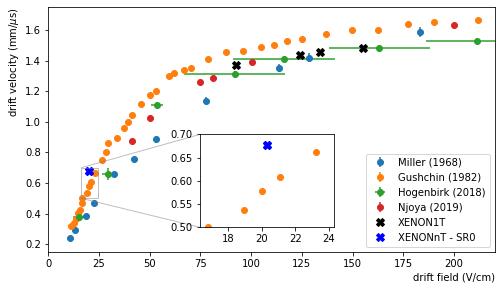

In [ ]:
compare_drift_velocity((vd1,vd1),(vd_err1,vd_err1))

In [10]:
def compare_diffusion(d_SR0,d_SR0_err,ms=5):
    diff_nT = [43.0, 42.7]
    diff_nT_err = [0.06, 0.02]
    diff_nTb = [45.3, 49.3, 52.1]
    diff_nTb_err = [0.6, 0.3, 0.3]
    field_nT = np.full(len(diff_nT),18.3)
    field_nTb = np.full(len(diff_nTb),18.3)
    field_SR0 = np.full(len(d_SR0),20.3)
    plt.figure(figsize=(12,6))
    #plt.errorbar(field_nTb,diff_nTb,yerr=diff_nTb_err,fmt='o',ms=ms,color='b',label='bkg - commissioning')
    plt.errorbar(field_nT,diff_nT,yerr=diff_nT_err,fmt='o',ms=ms,color='r',label='Kr83m - commissioning')
    plt.errorbar(field_SR0,d_SR0,yerr=d_SR0_err,fmt='o',ms=ms,color='g',label='Kr83m - SR0')
    plt.xlabel("drift field (V/cm)", ha='right', x=1)
    plt.ylabel("diffusion constant (cm$^2$/s)", ha='right', y=1)
    plt.legend()

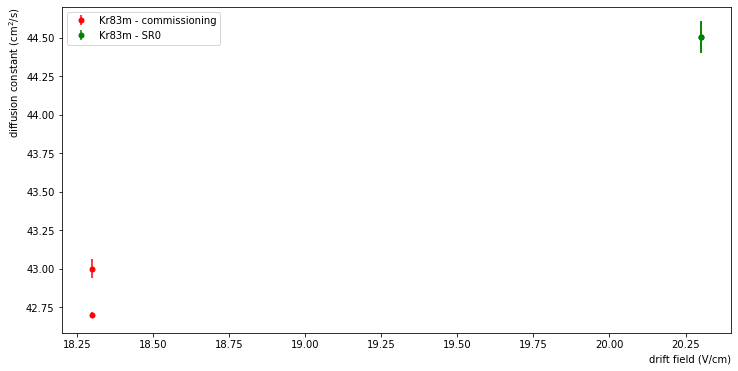

In [11]:
compare_diffusion((diff1,diff1), (diff_err1,diff_err1))

(6.2e-05, 6.9e-05)

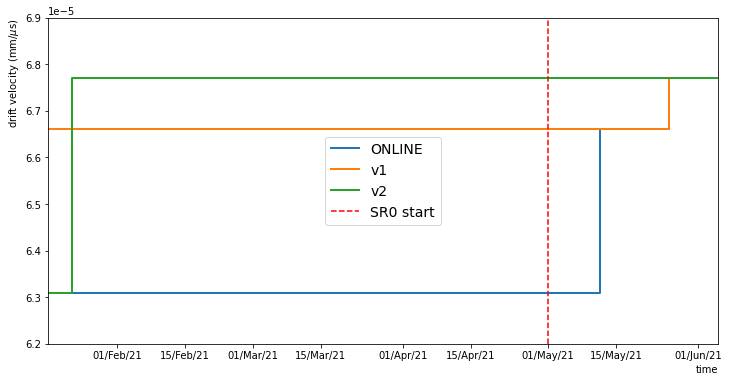

In [68]:
import matplotlib.dates as mdates
times = ['2017-01-01 00:00:00+00:00','2021-01-22 19:04:58+00:00','2021-05-01 00:00:00+00:00',
         '2021-05-11 17:55:00+00:00','2021-05-25 21:20:00+00:00','2021-06-05 00:00:00+00:00',
         '2030-12-31 23:59:59+00:00']
time = pd.to_datetime(times)
v_online = [0.00013325, 6.31e-05, 6.31e-05, 6.31e-05, 6.66e-05, 6.77e-05, 6.77e-05]
v1 = [0.00013325, 6.66e-05, 6.66e-05, 6.66e-05, 6.66e-05, 6.77e-05, 6.77e-05]
v2 = [0.00013325, 6.31e-05, 6.77e-05, 6.77e-05, 6.77e-05, 6.77e-05, 6.77e-05]
fig, ax = plt.subplots(figsize=(12,6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%b/%y'))
plt.plot(time,v_online,lw=2,label='ONLINE',ds='steps')
plt.plot(time,v1,lw=2,label='v1',ds='steps')
plt.plot(time,v2,lw=2,label='v2',ds='steps')
#plt.axvline(time[1],c='black',ls='--',label='commissioning start')
plt.axvline(time[2],c='r',ls='--',label='SR0 start')
plt.xlabel('time',ha='right',x=1)
plt.ylabel('drift velocity (mm/$\mu$s)',ha='right',y=1)
plt.legend(fontsize=14)
plt.xlim(time[1] - np.timedelta64(5, 'D'),time[5])
plt.ylim(6.2e-5,6.9e-5)